# SWOT data viz


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load / base filter SWOT data

In [9]:
# Read the csv from hydrochron pull
SWOT_full_df = pd.read_csv('/Users/camryn/Documents/Duke/courses/geospatial_data_analysis/SWOTson_River_Camryn/Watson_reach_df.csv')

# Remove duplicates based on reach_id, time, and wse (will filter for NaNs)
SWOT_df = SWOT_full_df.drop_duplicates(subset=['reach_id', 'time', 'wse'], keep='first')

# Base filter SWOT data
SWOT_df_filtered = SWOT_df[
    #(SWOT_df['reach_q'] < 2) &
    (SWOT_df['xtrk_dist'].abs() >= 10000) & # SWOT values are only valid from 10-60km cross track
    (SWOT_df['xtrk_dist'].abs() <= 60000) &
    (SWOT_df['partial_f'] == 0) & # only keep reaches that have >50% swath coverage
    (SWOT_df['wse'] > 0) # another NaN check
    # Potential additional filters:
    # & (SWOT_df['dark_frac'] <= 50) # dark water
    # & (SWOT_df['wse_u'] <= 0.5) # wse uncertainty
]


In [ ]:
# df checks / exploration

# total filtered obs count
print("Data retention:", len(SWOT_df_filtered)/len(SWOT_full_df))
print("Data retention post nan filter:", len(SWOT_df_filtered)/len(SWOT_df))

# col names
print(SWOT_df_filtered.columns.tolist())

Data retention: 0.40875912408759124
Data retention post nan filter: 0.5137614678899083
['reach_id', 'time', 'time_tai', 'time_str', 'p_lat', 'p_lon', 'wse', 'wse_u', 'wse_r_u', 'slope', 'slope_u', 'slope_r_u', 'slope2', 'slope2_u', 'slope2_r_u', 'width', 'width_u', 'area_total', 'area_tot_u', 'area_detct', 'area_det_u', 'area_wse', 'layovr_val', 'node_dist', 'xtrk_dist', 'reach_q', 'reach_q_b', 'dark_frac', 'xovr_cal_q', 'cycle_id', 'pass_id', 'sword_version', 'p_dist_out', 'partial_f', 'n_good_nod', 'time_units', 'time_tai_units', 'p_lat_units', 'p_lon_units', 'wse_units', 'wse_u_units', 'wse_r_u_units', 'slope_units', 'slope_u_units', 'slope_r_u_units', 'slope2_units', 'slope2_u_units', 'slope2_r_u_units', 'width_units', 'width_u_units', 'area_total_units', 'area_tot_u_units', 'area_detct_units', 'area_det_u_units', 'area_wse_units', 'layovr_val_units', 'node_dist_units', 'xtrk_dist_units', 'dark_frac_units', 'p_dist_out_units', 'n_good_nod_units']


##### Timeseries plots

/var/folders/tz/g_8hxmvd0cb8yd6lk9pv5b500000gn/T/ipykernel_95079/936276300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])


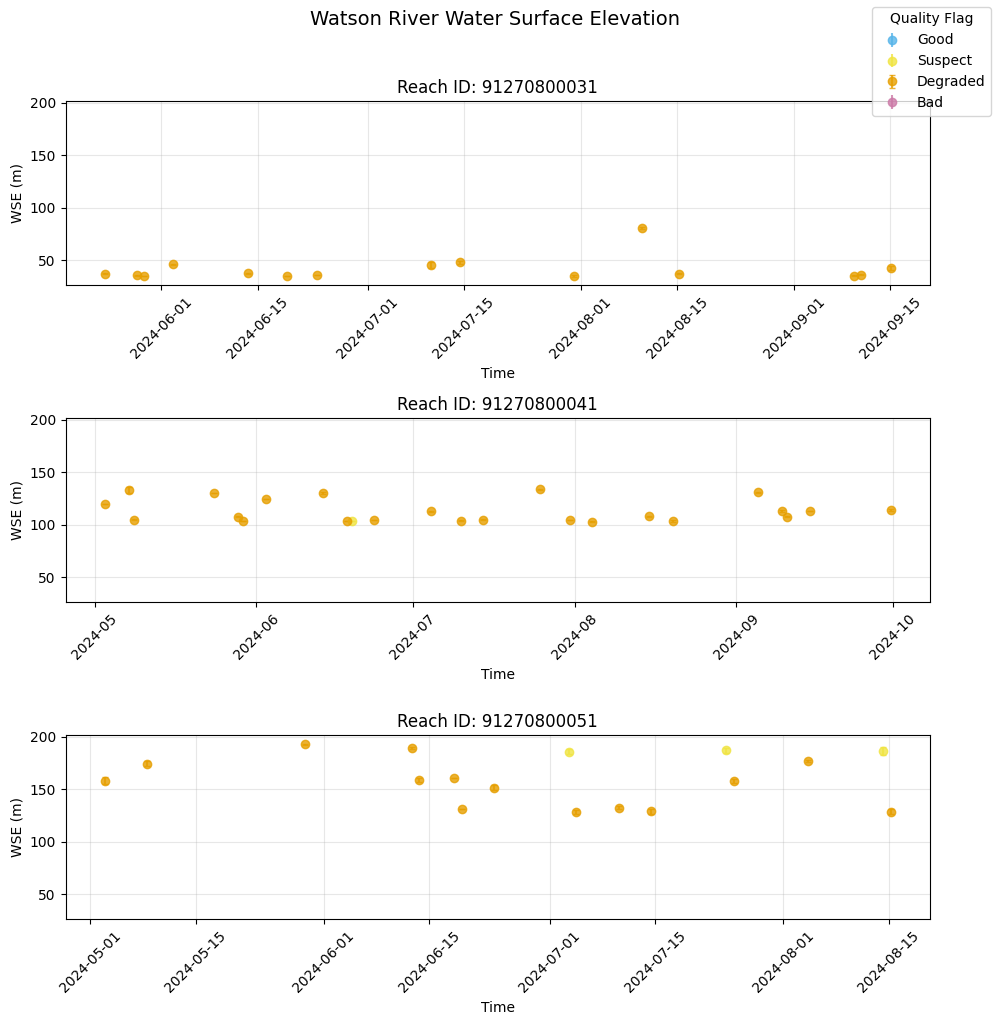

In [22]:
# WSE plot

# time_str to datetime and sort globally
SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])

# Define colormap for quality flags
quality_labels = {0: 'Good', 1: 'Suspect', 2: 'Degraded', 3: 'Bad'}
quality_colors = {0: '#56B4E9', 1: '#F0E442', 2: '#E69F00', 3: '#CC79A7'}

# get reach ids (hardcoded for 3 reaches)
reach_ids = SWOT_df_filtered['reach_id'].unique()[:3]

# plot
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharey=True)

for i, reach in enumerate(reach_ids):
    ax = axes[i]
    reach_data = SWOT_df_filtered[SWOT_df_filtered['reach_id'] == reach]
    
    # Plot by quality flag
    for q_val, label in quality_labels.items():
        subset = reach_data[reach_data['reach_q'] == q_val]
        ax.errorbar(
            subset['time_str'],
            subset['wse'],
            yerr=subset['wse_u'],
            fmt='o',
            color=quality_colors[q_val],
            label=label if i == 0 else None,  # show legend just on the first plot
            alpha=0.8,
            capsize=2
        )

    ax.set_title(f"Reach ID: {reach}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("WSE (m)")
axes[1].set_ylabel("WSE (m)")
axes[2].set_ylabel("WSE (m)")
fig.legend(title="Quality Flag", loc="upper right")
fig.suptitle("Watson River Water Surface Elevation", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


/var/folders/tz/g_8hxmvd0cb8yd6lk9pv5b500000gn/T/ipykernel_95079/2265694297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])


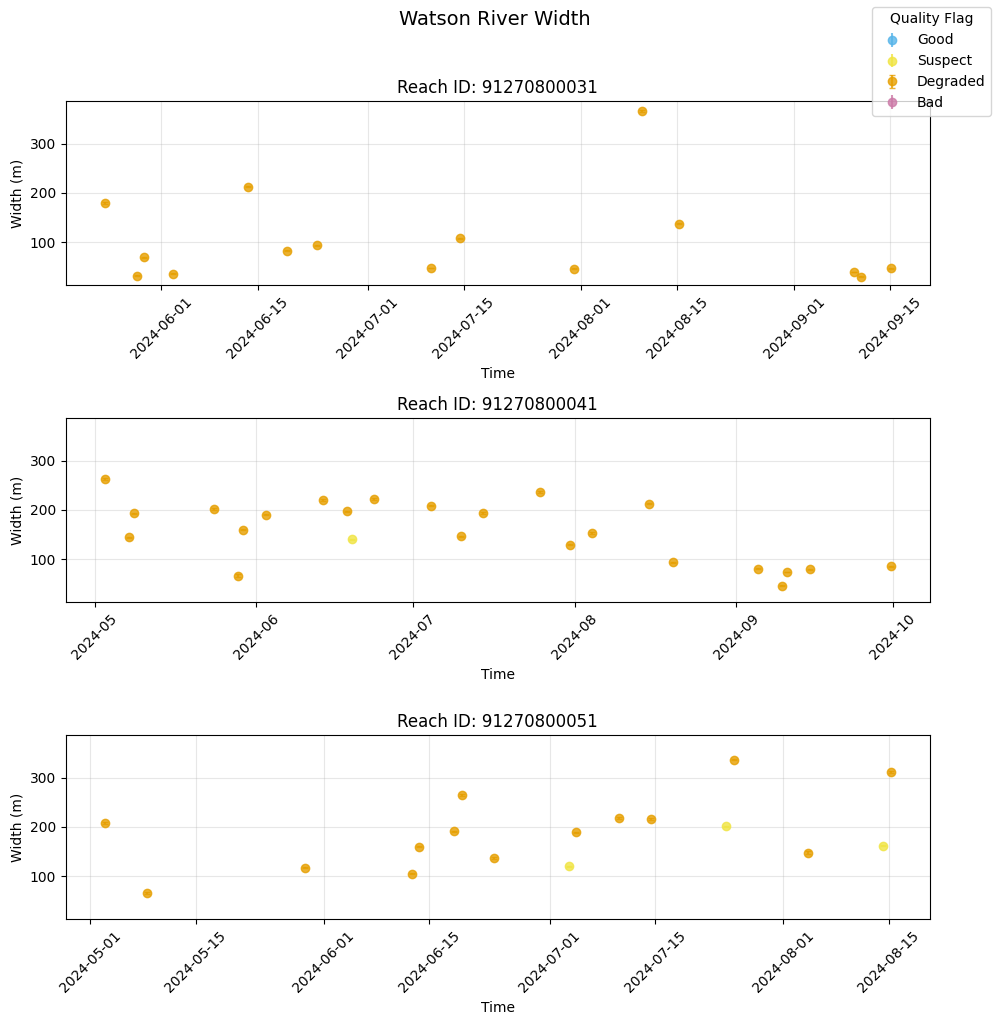

In [23]:
# WSE plot

# time_str to datetime and sort globally
SWOT_df_filtered['time_str'] = pd.to_datetime(SWOT_df_filtered['time_str'])

# Define colormap for quality flags
quality_labels = {0: 'Good', 1: 'Suspect', 2: 'Degraded', 3: 'Bad'}
quality_colors = {0: '#56B4E9', 1: '#F0E442', 2: '#E69F00', 3: '#CC79A7'}

# get reach ids (hardcoded for 3 reaches)
reach_ids = SWOT_df_filtered['reach_id'].unique()[:3]

# plot
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharey=True)

for i, reach in enumerate(reach_ids):
    ax = axes[i]
    reach_data = SWOT_df_filtered[SWOT_df_filtered['reach_id'] == reach]
    
    # Plot by quality flag
    for q_val, label in quality_labels.items():
        subset = reach_data[reach_data['reach_q'] == q_val]
        ax.errorbar(
            subset['time_str'],
            subset['width'],
            yerr=subset['width_u'],
            fmt='o',
            color=quality_colors[q_val],
            label=label if i == 0 else None,  # show legend just on the first plot
            alpha=0.8,
            capsize=2
        )

    ax.set_title(f"Reach ID: {reach}")
    ax.set_xlabel("Time")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Width (m)")
axes[1].set_ylabel("Width (m)")
axes[2].set_ylabel("Width (m)")
fig.legend(title="Quality Flag", loc="upper right")
fig.suptitle("Watson River Width", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()
